Dataset Description:

The dataset contains datasets from a study that was conducted between 1958 and 1970 at University of Chicago's Bikkings Hospital on the survival of patients who had undergone surgery for the breast Cancer.
The dataset contains 4 attributes along with the target attribute to classify. Attribute information are:
1. Age of the patient during Operation
2. Patient's Year of Operation
3. The no. of positive nodes Detected
4. Survival Status(1= The patient survive 5 years or longer, 2= The patient died within five years)-- Target attribute.

Objective:

To explore and understand Haberman Cancer Dataste and analyse which feature or combination of features helps in determining the status of person in 5 years after the operation.


In [2]:
#Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load the dataset
cancerpatient=pd.read_csv('haberman.csv')
print(cancerpatient.shape)
cancerpatient.head()

(306, 4)


,Age,Operation_year,No_of_nodes,Survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [3]:
#Look any data points are missing and also look for attribute datatypes
cancerpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              306 non-null    int64
 1   Operation_year   306 non-null    int64
 2   No_of_nodes      306 non-null    int64
 3   Survival_status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [6]:
#Count number of classes
no_of_classes=cancerpatient['Survival_status'].unique()
print(no_of_classes)
print("The number of classes to classify is",len(no_of_classes))
#Map 1 to Died and 2 to survive
cancerpatient['Survival_status']=cancerpatient['Survival_status'].apply(lambda x: "Survived" if x==1 else "Died")
#Count total no of survived and died patients
print(cancerpatient['Survival_status'].value_counts())
#Normalizing the value target variable
print("\n"+str(cancerpatient['Survival_status'].value_counts(normalize=True)))

[1 2]
The number of classes to classify is 2
Survival_status
Survived    225
Died         81
Name: count, dtype: int64

Survival_status
Survived    0.735294
Died        0.264706
Name: proportion, dtype: float64


In [6]:
#Data Description
cancerpatient.describe()

,Age,Operation_year,No_of_nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


Univariate Data Anlaysis

To determine which feature influence the most in survival of the patient, we first use distribution of target variable with all attribute and then heatmap.

c:\Users\desktop\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Users\desktop\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



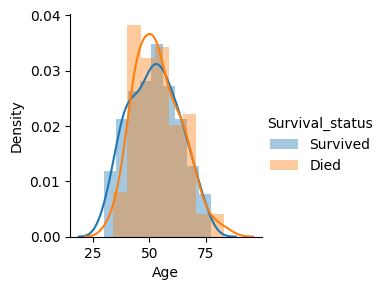

In [16]:
#1. Histogram: age vs survival rates 
sns.FacetGrid(cancerpatient, hue='Survival_status')\
    .map(sns.distplot,"Age").add_legend()
plt.show() 

c:\Users\desktop\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Users\desktop\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



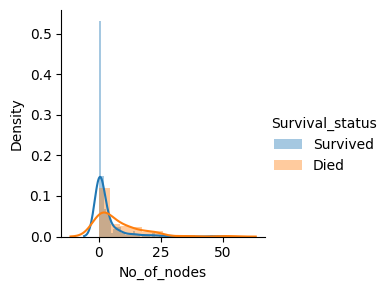

In [9]:
#Histogram No. of nodes vs survival rate
sns.FacetGrid(cancerpatient, hue='Survival_status')\
    .map(sns.distplot,"No_of_nodes").add_legend()
plt.show()

c:\Users\desktop\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Users\desktop\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



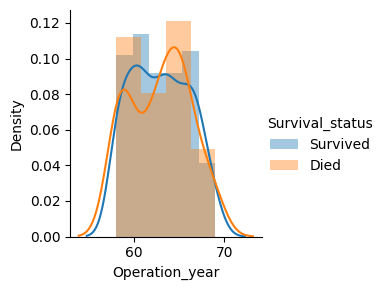

In [10]:
sns.FacetGrid(cancerpatient, hue='Survival_status')\
    .map(sns.distplot,"Operation_year").add_legend()
plt.show()

From above graphs we can see that the plot bewteen number of nodes and survival status is less overlapping as compared to age and operation year. So, The influencing attribute for survival status is number of nodes present in the patient.

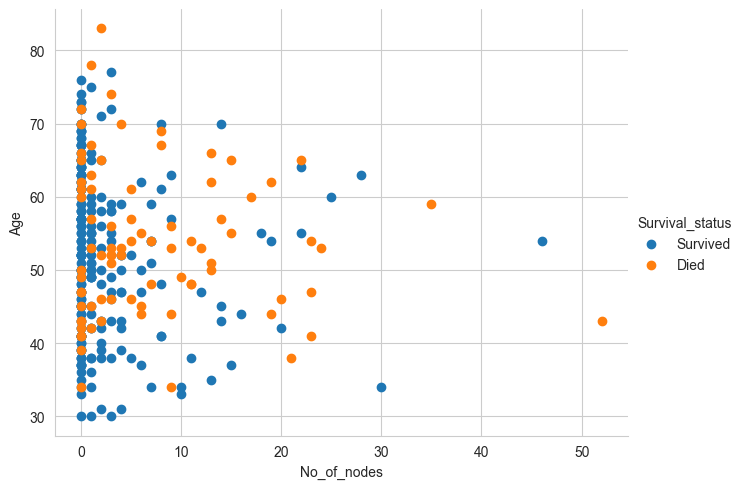

In [29]:
sns.set_style("whitegrid")
sns.FacetGrid(cancerpatient, hue="Survival_status",height=5,aspect=1.3)\
 .map(plt.scatter, "No_of_nodes", "Age") \
 .add_legend();
plt.show();

The graph shows that there is no clear rules that determines target variable. The data are not clearly clustered. Now lets go for pair plots.

c:\Users\desktop\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


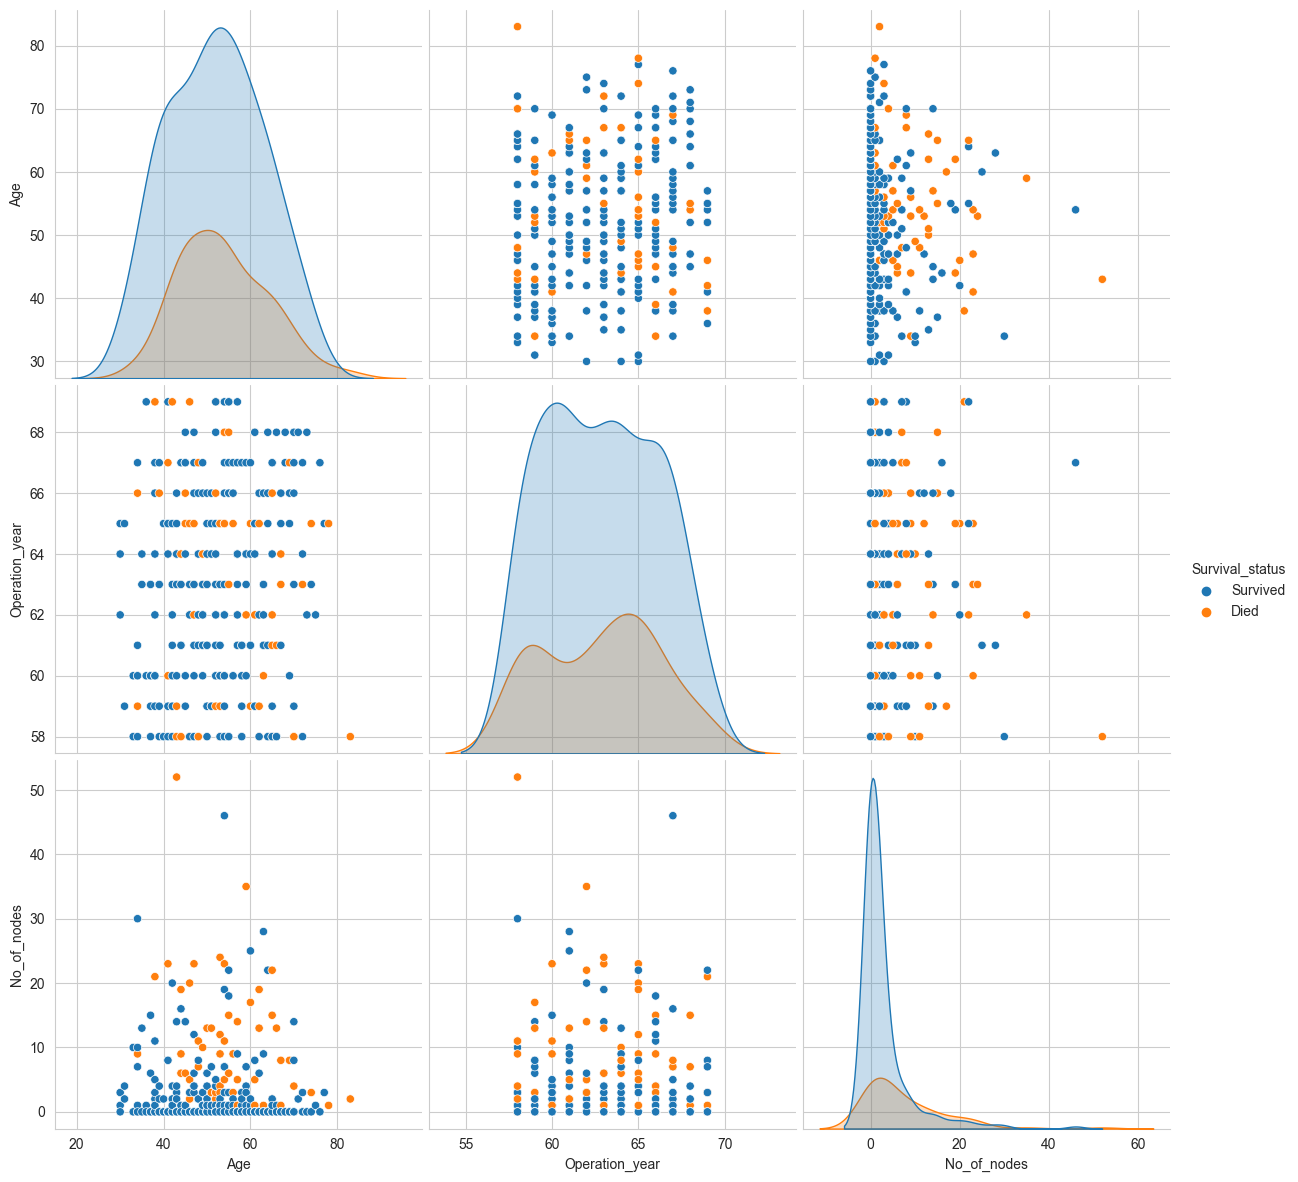

In [30]:
#Pair Plots
sns.set_style("whitegrid")
sns.pairplot(cancerpatient, hue="Survival_status",size=4)
plt.show();


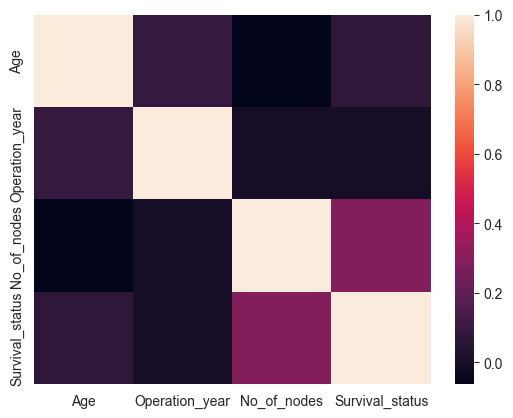

In [42]:
#Drawing Heatmap for visualizing co-relaton 
cancerpatient1=pd.read_csv("haberman.csv")
data=cancerpatient1.corr()
sns.heatmap(data)
plt.show()


This heatmap shows that survival status is more corelated with no. of nodes present.

No attributes are clearly defining the survival status of the patient. So, We can't clearly classify survival status only with given parameters.

Now we are going to plot probability density function and cumulative density function.
1.PDF and CDF for patient survived more than 5 years

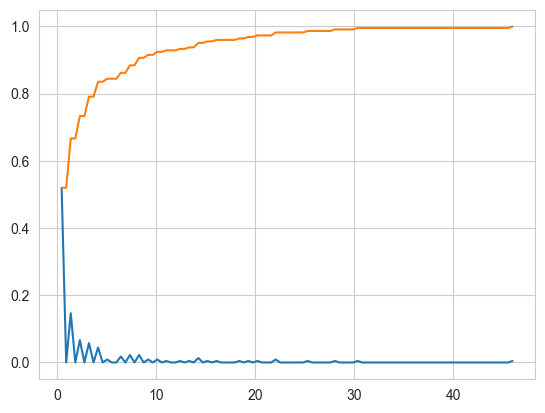

In [36]:
survived_morethan_5years=cancerpatient.loc[cancerpatient["Survival_status"]=="Survived"]
counts, bin_edges=np.histogram(survived_morethan_5years["No_of_nodes"],bins=100,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()

From the above distribution we can say that 55% of the people with 0 no of nodes survives. The more is the nodes count the probability to survive is less.

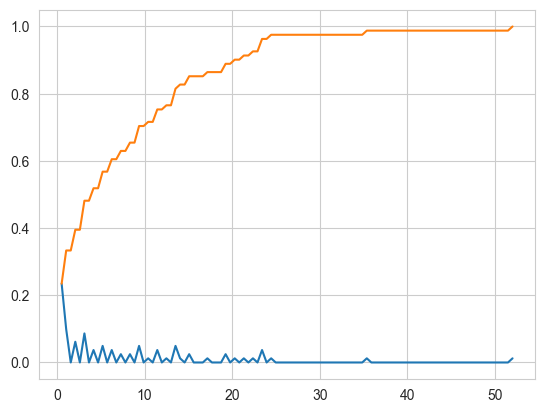

In [38]:
survived_lessthan_5years=cancerpatient.loc[cancerpatient["Survival_status"]=="Died"]
counts, bin_edges=np.histogram(survived_lessthan_5years["No_of_nodes"],bins=100,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()

From the above distribution we can conclude that 20-24% of the patient with 0 no of nodes died. There is significant probability that the patient die with more number of nodes.

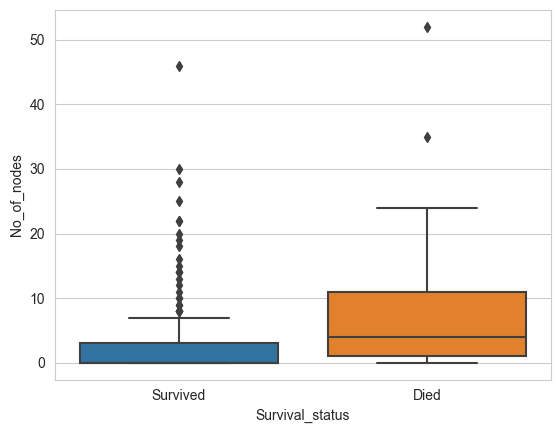

In [37]:
#Box Plot
sns.set_style("whitegrid")
sns.boxplot(data=cancerpatient,x="Survival_status",y="No_of_nodes")
plt.show()

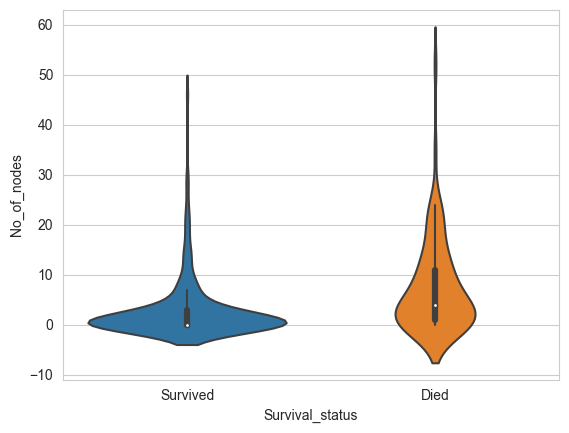

In [45]:
#Violin plot
sns.violinplot(data=cancerpatient,x="Survival_status",y="No_of_nodes")
plt.show()

The violin plot descibes that the patient with more no of nodes may not live more than five years.

Multivariate Analysis


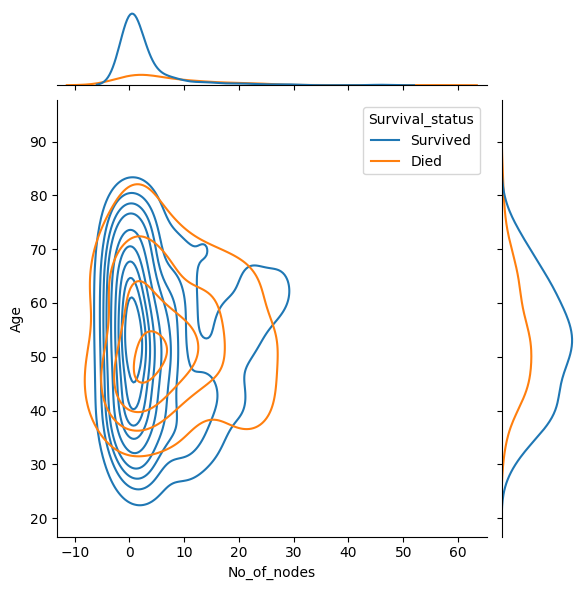

In [12]:
#Countour plot
plt.close()
sns.jointplot(x="No_of_nodes",y="Age",data=cancerpatient,kind="kde",hue="Survival_status")
plt.show()

From above EDA we can't clearly identify which varibale or attribute is influencing directly to the survival status of patient. Among all number of nodes present is more co-related or influencing the survival status of patient.